In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import seaborn as sns
import env as ep

In [3]:
iris = sns.load_dataset('iris')

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# 1. What does the distribution of petal lengths look like?

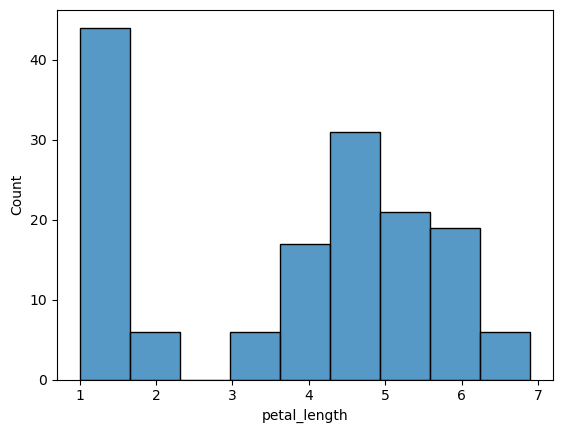

In [6]:
sns.histplot(iris, x="petal_length")
plt.show()

In [7]:
# 2. Is there a relationship between petal length and petal width? Yes

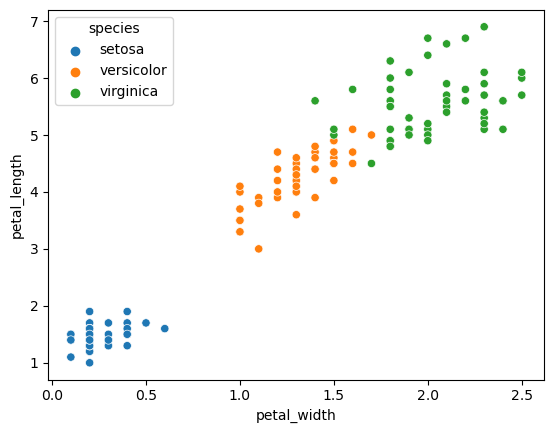

In [8]:
sns.scatterplot(x='petal_width', y='petal_length', hue="species", data=iris)
plt.show()


In [9]:
# 3. Would it be reasonable to predict species based on sepal width and sepal length?
# For this, you'll visualize two numeric columns through the lense of a categorical column. No

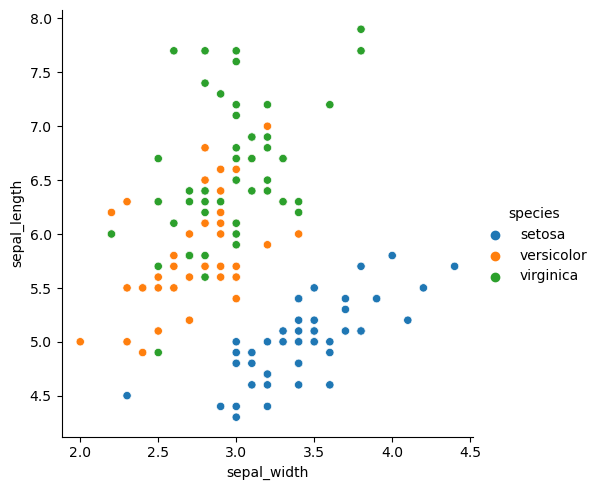

In [10]:
sns.relplot(x="sepal_width", y="sepal_length", hue="species", data=iris)

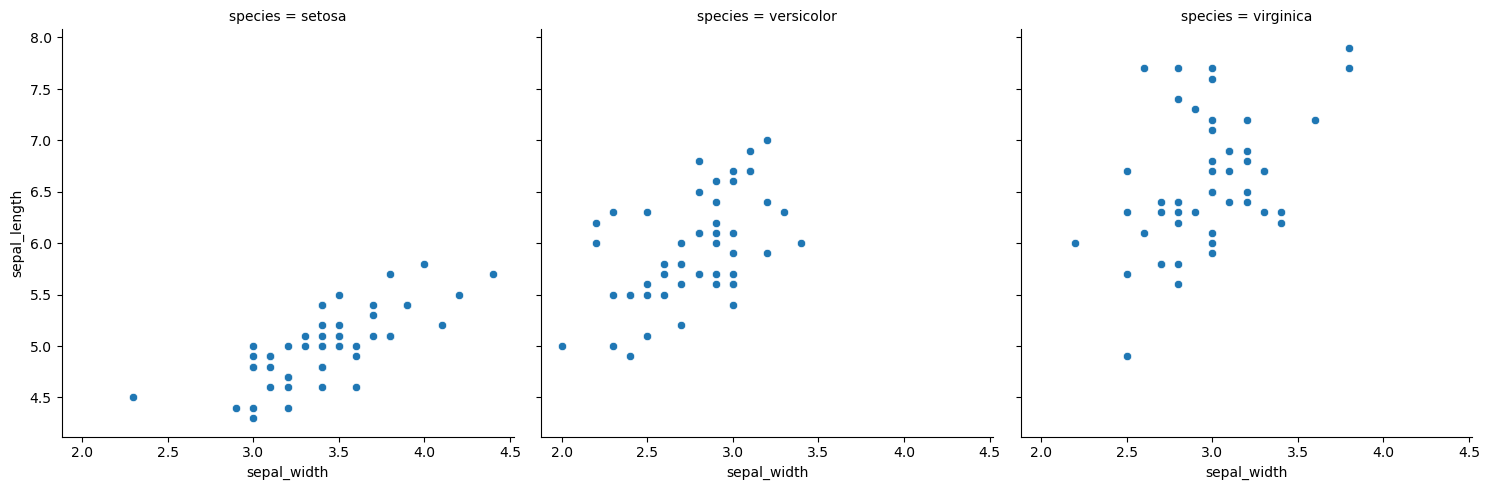

In [11]:
sns.relplot(x="sepal_width", y="sepal_length", col="species", data=iris)

In [12]:
# 4. Which features would be best used to predict species? petal length and width

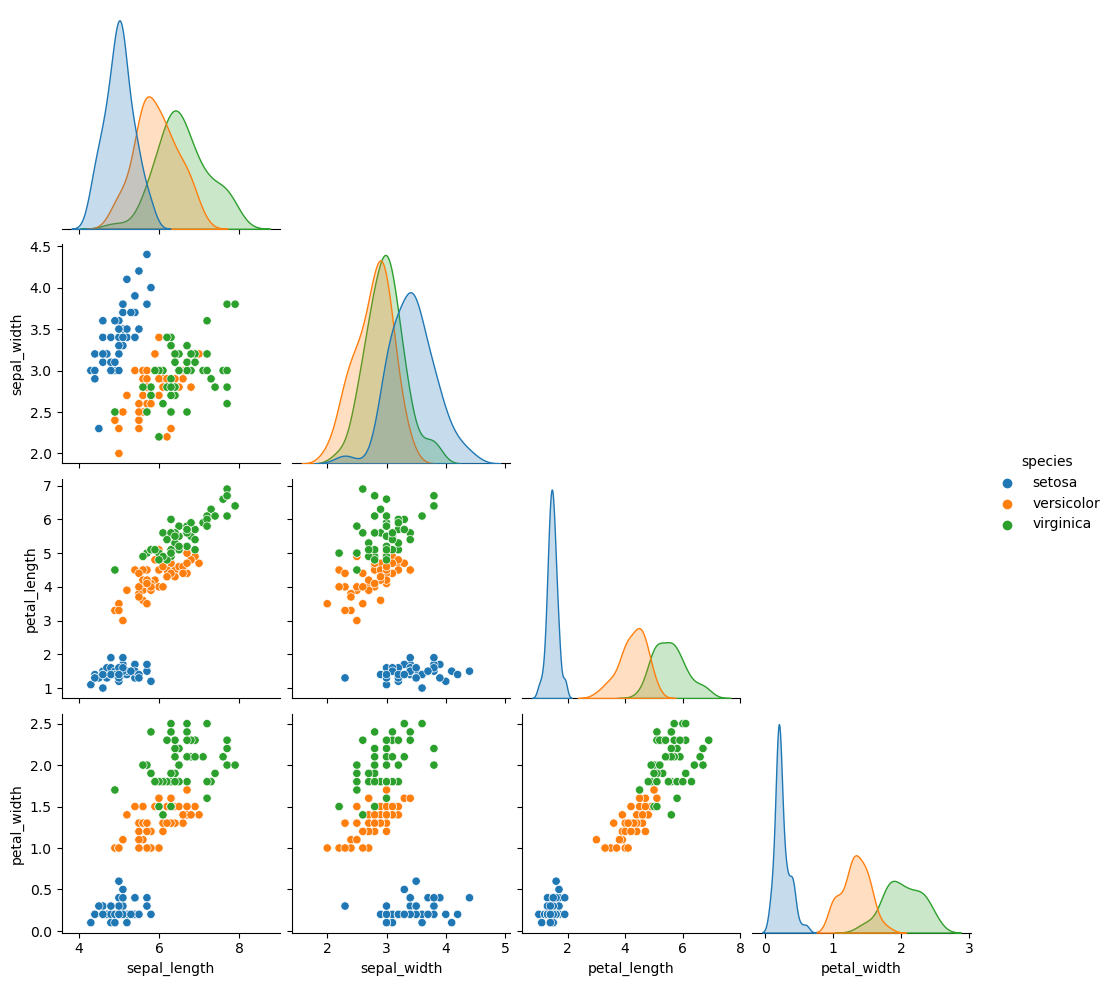

In [13]:
sns.pairplot(data=iris, corner=True, hue="species")
plt.show()

In [14]:
anscombe = sns.load_dataset('anscombe')

In [15]:
# 1. Load the anscombe dataset from seaborn. Use pandas to group the data by the dataset column,
# and calculate summary statistics for each dataset. What do you notice?
# - Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [16]:
anscombe.groupby("dataset").describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

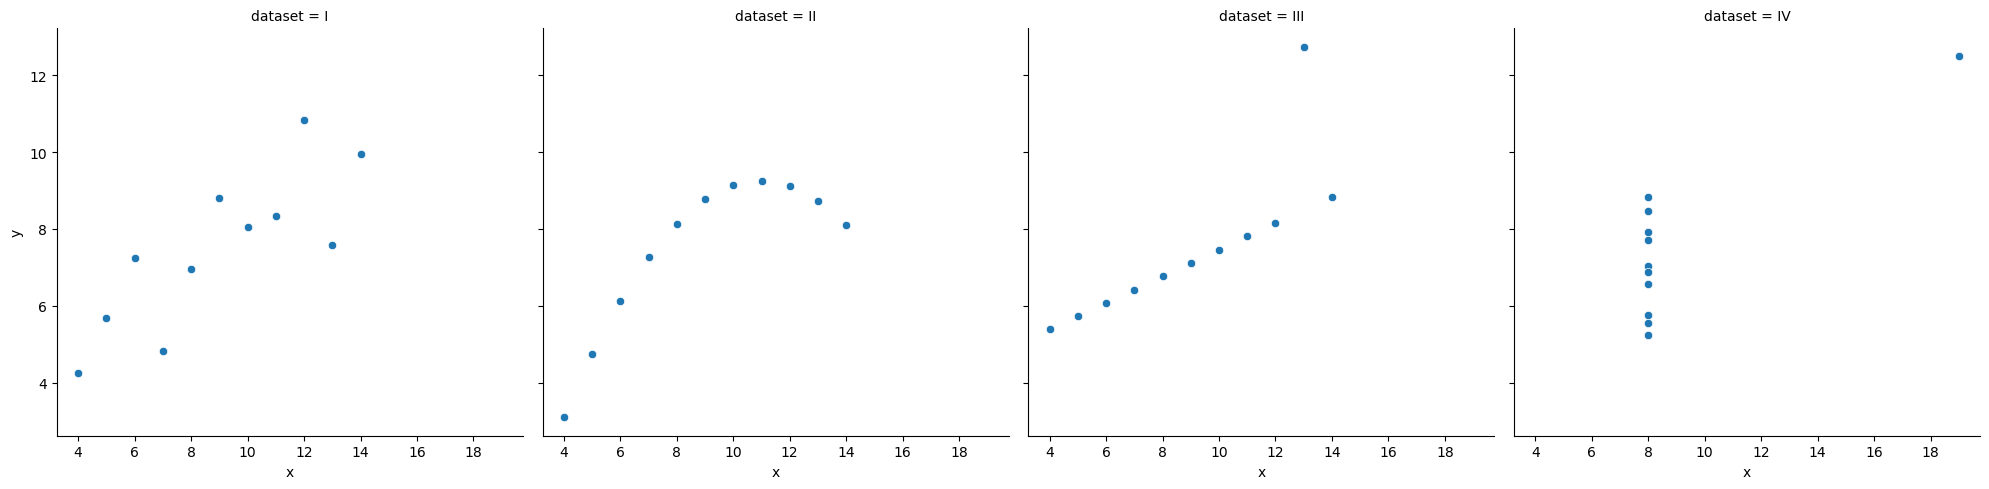

In [17]:
sns.relplot(data=anscombe, x="x", y="y", col="dataset")
plt.show()

In [18]:
# 2. Load the InsectSprays dataset from pydataset and read it's documentation. 
# Create a boxplot that shows the effectiveness of the different insect sprays.

In [19]:
# data('InsectSprays', show_doc=True)

In [20]:
insect = data('InsectSprays')

In [21]:
insect.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


In [22]:
insect.spray.value_counts()

A    12
B    12
C    12
D    12
E    12
F    12
Name: spray, dtype: int64

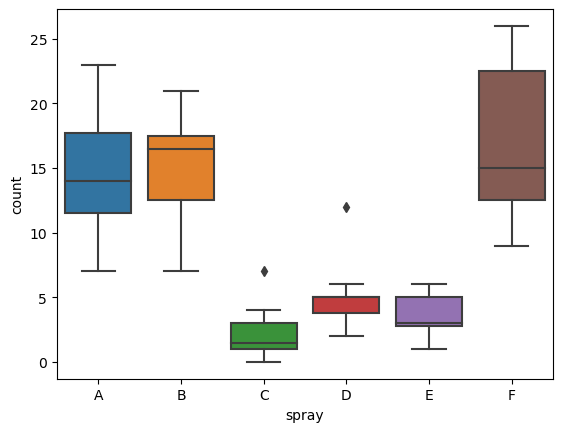

In [23]:
sns.boxplot(data=insect, x="spray", y="count")
plt.show()

In [24]:
# 3. Load the swiss dataset from pydataset and read it's documentation. 
# Create visualizations to answer the following questions:

# Create an attribute named is_catholic that holds a boolean value of whether or not 
# the province is Catholic. (Choose a cutoff point for what constitutes catholic)


In [25]:
# data("swiss",show_doc=True)
swiss = data("swiss")

In [26]:
swiss["is_catholic"] = swiss.Catholic > 50

In [27]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


In [28]:
# Does whether or not a province is Catholic influence fertility? Yes

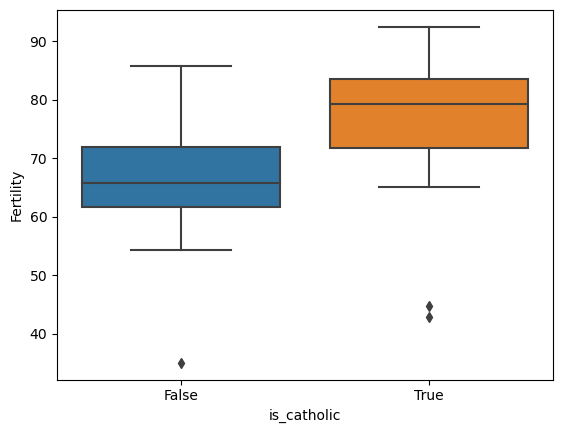

In [29]:
sns.boxplot(data=swiss, x="is_catholic", y="Fertility")
plt.show()

In [30]:
# What measure correlates most strongly with fertility? education, examination

In [31]:
swiss.corr()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556,0.402813
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859,0.410503
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022,-0.597861
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322,-0.154677
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496,0.961723
Infant.Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000,0.166081
is_catholic,0.402813,0.410503,-0.597861,-0.154677,0.961723,0.166081,1.000000


<AxesSubplot:>

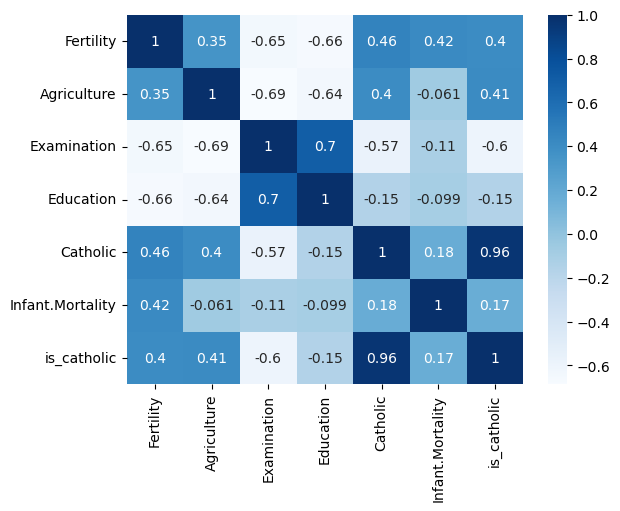

In [32]:
sns.heatmap(swiss.corr(), annot=True, cmap="Blues")

Fertility


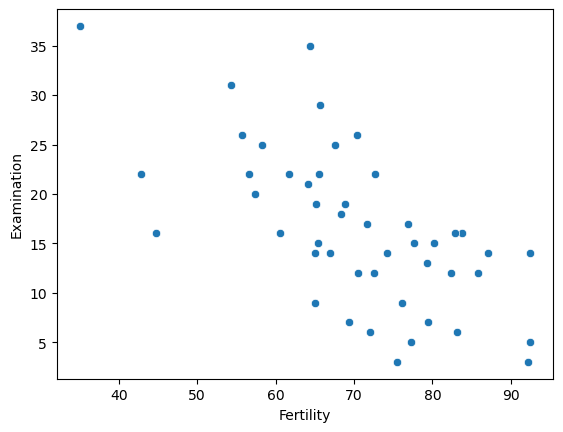

Agriculture


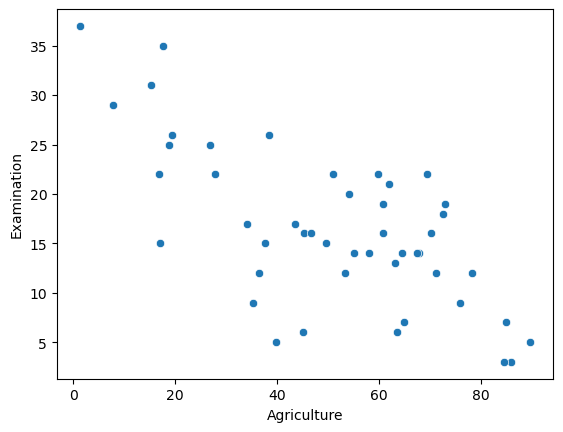

Examination


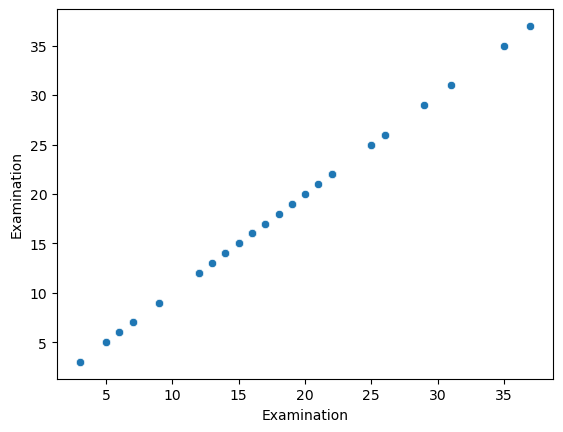

Education


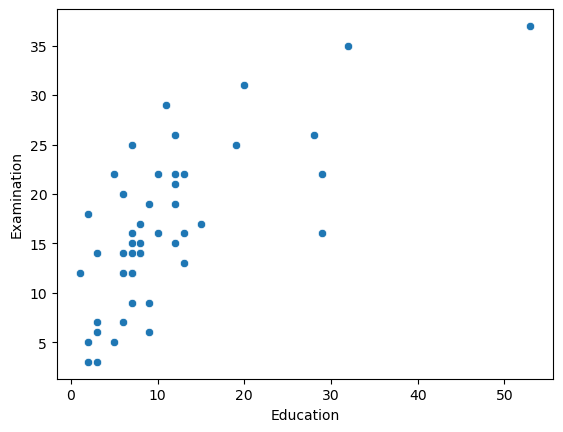

Catholic


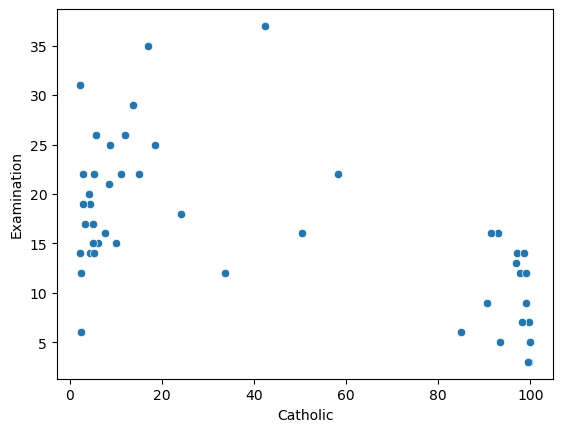

Infant.Mortality


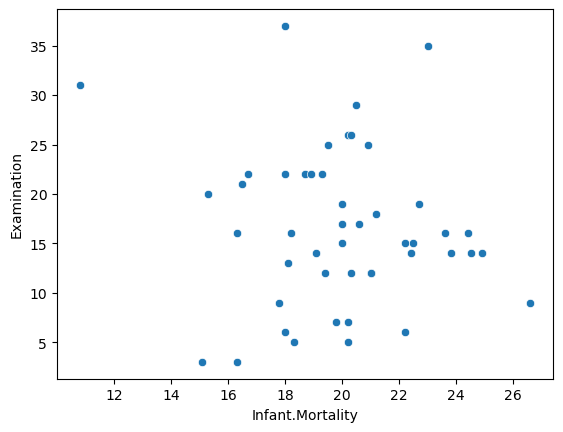

is_catholic


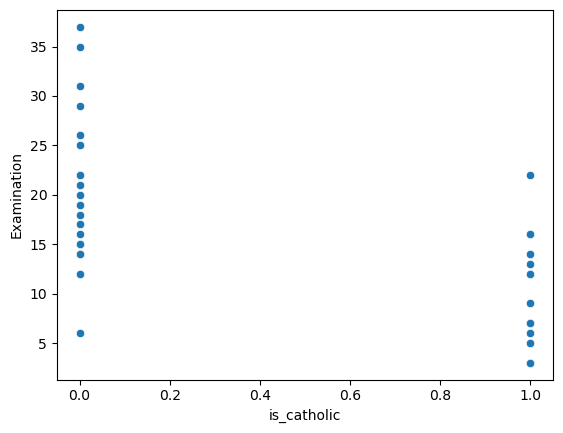

In [33]:
for col in swiss:
    print(col)
    sns.scatterplot(data=swiss, x=col, y="Examination")
    plt.show()

In [34]:
# 4. Load the chipotle dataset from SQL, create a bar chart that shows the 4 most popular items and 
# the revenue produced by each.

In [35]:
chipotle = pd.read_sql("select * from orders", ep.get_db_url("chipotle"))

In [36]:
chipotle["item_price"] = chipotle.item_price.str.strip("$").astype(float)

In [37]:
pop_4 = chipotle.groupby("item_name").quantity.sum().sort_values(ascending=False).head(4)

In [38]:
all_price = chipotle.groupby("item_name").item_price.sum()

In [39]:
pop_order = pd.merge(pop_4, all_price, on="item_name")
pop_order = pop_order.reset_index()
pop_order

,item_name,quantity,item_price
0,Chicken Bowl,761,7342.73
1,Chicken Burrito,591,5575.82
2,Chips and Guacamole,506,2201.04
3,Steak Burrito,386,3851.43


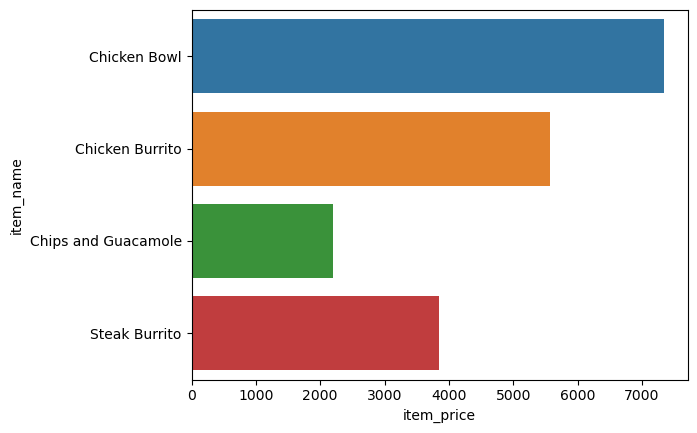

In [40]:
sns.barplot(data=pop_order, y='item_name', x='item_price')
plt.show()

In [41]:
# 5. Load the sleepstudy dataset from pydataset and read it's documentation. Use seaborn to create a line chart 
# of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [42]:
# data("sleepstudy", show_doc=True)

In [43]:
sleep =data("sleepstudy")

In [44]:
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [45]:
sleep.Subject.unique()

array([308, 309, 310, 330, 331, 332, 333, 334, 335, 337, 349, 350, 351,
       352, 369, 370, 371, 372])

In [47]:
sleep.Subject = sleep.Subject.astype(str)

AttributeError: 'Line2D' object has no property 'errorbar'

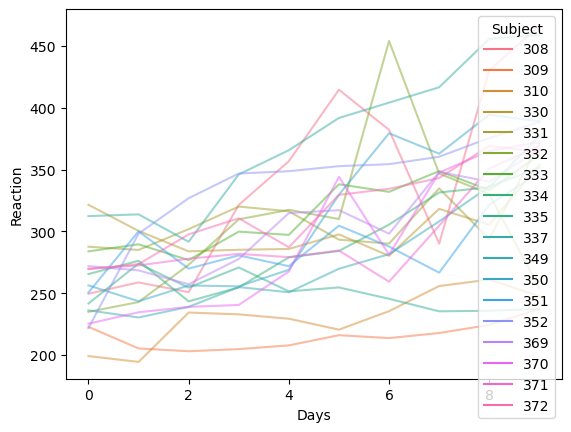

In [49]:
sns.lineplot(data=sleep, x='Days', y='Reaction', hue='Subject', alpha=.5)
sns.lineplot(data=sleep, x='Days', y='Reaction', 
             color = 'black', errorbar=('ci',False), linewidth=4)

plt.title('Reaction Time of Subjects')
plt.legend()
plt.show()